In [19]:
# classify if mushroom is posionous or not
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [20]:
# read file 
df = pd.read_csv('mushrooms.csv')

In [21]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [22]:
X = df.drop('class', axis=1) # split dataset into raw features and lables
y = df['class']

In [24]:
y=y.map({'p':'Posionous', 'e':'Edible'}) # dataframe map function 
cat_cols=X.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print(f'col name :{col}, N Unique: {X[col].nunique()}')

col name :cap-shape, N Unique: 6
col name :cap-surface, N Unique: 4
col name :cap-color, N Unique: 10
col name :bruises, N Unique: 2
col name :odor, N Unique: 9
col name :gill-attachment, N Unique: 2
col name :gill-spacing, N Unique: 2
col name :gill-size, N Unique: 2
col name :gill-color, N Unique: 12
col name :stalk-shape, N Unique: 2
col name :stalk-root, N Unique: 5
col name :stalk-surface-above-ring, N Unique: 4
col name :stalk-surface-below-ring, N Unique: 4
col name :stalk-color-above-ring, N Unique: 9
col name :stalk-color-below-ring, N Unique: 9
col name :veil-type, N Unique: 1
col name :veil-color, N Unique: 4
col name :ring-number, N Unique: 3
col name :ring-type, N Unique: 5
col name :spore-print-color, N Unique: 9
col name :population, N Unique: 6
col name :habitat, N Unique: 7


0       Posionous
1          Edible
2          Edible
3       Posionous
4          Edible
          ...    
8119       Edible
8120       Edible
8121       Edible
8122    Posionous
8123       Edible
Name: class, Length: 8124, dtype: object

In [26]:
for col in cat_cols:  # convert into categorical value 
    X[col]=X[col].astype('category')
    X[col]=X[col].cat.codes
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [27]:
# import package 
from sklearn.preprocessing import StandardScaler # transform to standardScaler
from sklearn.decomposition import PCA


In [28]:
X_std = StandardScaler().fit_transform(X)

In [34]:
X_pca = PCA(n_components=2).fit_transform(X_std)
X_pca = np.vstack((X_pca.T, y)).T

In [35]:
df_pca = pd.DataFrame(X_pca, columns=['1st_component', '2nd_component', 'class'])

In [36]:
df_pca.head()

,1st_component,2nd_component,class
0,-0.574322,-0.975753,Posionous
1,-2.282103,0.279027,Edible
2,-1.858036,-0.270991,Edible
3,-0.88478,-0.75647,Posionous
4,0.689614,1.239271,Edible


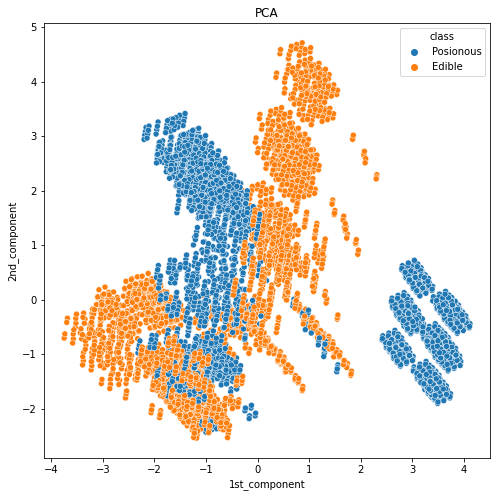

In [38]:
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_pca, hue='class', x='1st_component', y='2nd_component')
plt.title('PCA')
plt.show()

In [39]:
# Here we use t-SNE
from sklearn.manifold import TSNE

In [43]:
# set tsne
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_std)
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])
df_tsne.head()

/Users/robinchen/opt/anaconda3/envs/PyG/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/robinchen/opt/anaconda3/envs/PyG/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,Dim1,Dim2,class
0,-35.658524,-85.833389,Posionous
1,79.269829,-21.328075,Edible
2,38.04969,-4.811666,Edible
3,-34.222393,-80.319077,Posionous
4,56.315624,-8.17673,Edible


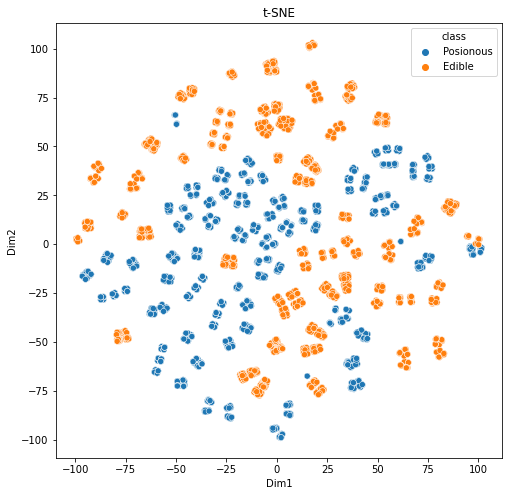

In [44]:
# draw figures
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.title('t-SNE')
plt.show()

Conclusion: By the above classification results, we can say t-SNE outperformed when compared with the performance of PCA.
t-SNE algorithm clustered poisonous and edible mushrooms without any overlapping.
PCA failed to cluster the mushroom classed perfectly.
